In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import numpy as np
import pandas as pd
from datetime import datetime

In [59]:
# Get data
data = pd.read_csv("archive.csv", sep = ',')

# Show data
pd.set_option('display.max_rows', data.shape[0]+1)
data

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


In [67]:
def age(year, born):
    try:
        year = datetime.strptime(str(year), "%Y")
        born = datetime.strptime(str(born), "%Y-%m-%d")
        return year.year - born.year - ((year.month, year.day) < (born.month, born.day))
    except:
        return 0

In [68]:
# Who gets prizes (name, gender, age)
data["Age"] = data.apply(lambda row: age(row["Year"], row["Birth Date"]), axis=1)  # Calculate age
data.loc[:, ["Full Name", "Sex", "Age"]]

,Full Name,Sex,Age
0,Jacobus Henricus van 't Hoff,Male,48
1,Sully Prudhomme,Male,61
2,Emil Adolf von Behring,Male,46
3,Jean Henry Dunant,Male,72
4,Frédéric Passy,Male,78
5,Wilhelm Conrad Röntgen,Male,55
6,Hermann Emil Fischer,Male,49
7,Christian Matthias Theodor Mommsen,Male,84
8,Ronald Ross,Male,44
9,Élie Ducommun,Male,68


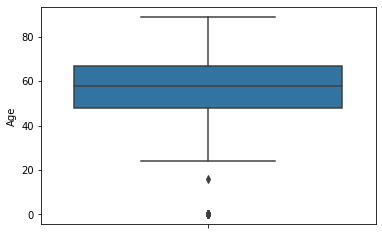

In [74]:
# Box plot age
_ = sns.boxplot(y="Age", data=data)
_ = plt.ylabel("Age")
plt.show()

In [91]:
# Oldest
data.loc[data["Age"].idxmax()]

Year                                                                 2007
Category                                                        Economics
Prize                   The Sveriges Riksbank Prize in Economic Scienc...
Motivation              "for having laid the foundations of mechanism ...
Prize Share                                                           1/3
Laureate ID                                                           820
Laureate Type                                                  Individual
Full Name                                                  Leonid Hurwicz
Birth Date                                                     1917-08-21
Birth City                                                         Moscow
Birth Country                                                      Russia
Sex                                                                  Male
Organization Name                                 University of Minnesota
Organization City                     

In [92]:
# Youngest
data.loc[data["Age"] > 0].min()

C:\Users\janth\AppData\Local\Temp/ipykernel_19164/1843024247.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.loc[data["Age"] > 0].min()


Year                                   1901
Category                          Chemistry
Prize            The Nobel Peace Prize 1901
Prize Share                             1/1
Laureate ID                               1
Laureate Type                    Individual
Full Name                   Aage Niels Bohr
Birth Date                       1817-11-30
Birth Country                     Argentina
Sex                                  Female
Age                                      16
dtype: object

In [99]:
# > 1 noble prizes
data[data.duplicated(["Full Name"])]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Age
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),Prussia (Poland),Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,53
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,43
158,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,189,Individual,Carl Bosch,1874-08-27,Cologne,Germany,Male,I.G. Farbenindustrie A.G.,Heidelberg,Germany,1940-04-26,Heidelberg,Germany,56
160,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,190,Individual,Friedrich Bergius,1884-10-11,"Goldschmieden, near Breslau",Germany (Poland),Male,I.G. Farbenindustrie A.G.,Mannheim-Rheinau,Germany,1949-03-30,Buenos Aires,Argentina,46
180,1934,Medicine,The Nobel Prize in Physiology or Medicine 1934,"""for their discoveries concerning liver therap...",1/3,328,Individual,William Parry Murphy,1892-02-06,"Stoughton, WI",United States of America,Male,Peter Brent Brigham Hospital,"Boston, MA",United States of America,1987-10-09,"Brookline, MA",United States of America,41
188,1936,Chemistry,The Nobel Prize in Chemistry 1936,"""for his contributions to our knowledge of mol...",1/1,195,Individual,Petrus (Peter) Josephus Wilhelmus Debye,1884-03-24,Maastricht,Netherlands,Male,Kaiser-Wilhelm-Institut (now Max-Planck-Instit...,Berlin,Germany,1966-11-02,"Ithaca, NY",United States of America,51
203,1938,Chemistry,The Nobel Prize in Chemistry 1938,"""for his work on carotenoids and vitamins""",1/1,198,Individual,Richard Kuhn,1900-12-03,Vienna,Austria-Hungary (Austria),Male,University of Heidelberg,Heidelberg,Germany,1967-07-31,Heidelberg,West Germany (Germany),37
209,1939,Chemistry,The Nobel Prize in Chemistry 1939,"""for his work on sex hormones""",1/2,199,Individual,Adolf Friedrich Johann Butenandt,1903-03-24,Bremerhaven-Lehe,Germany,Male,Berlin University,Berlin,Germany,1995-01-18,Munich,Germany,35
222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
255,1949,Medicine,The Nobel Prize in Physiology or Medicine 1949,"""for his discovery of the therapeutic value of...",1/2,348,Individual,Antonio Caetano de Abreu Freire Egas Moniz,1874-11-29,Avanca,Portugal,Male,Neurological Institute,Lisbon,Portugal,1955-12-13,Lisbon,Portugal,74
